# Weight Details Editor
Author: Brent Artuch <br>
Date: 2023-06-04

## Introduction

The code in this notebook works with the `weight_details` table in the `diet` SQLite database. Entries
are added to the table and then the statistical visualizations are updated based on the new data. The
measurements are taken using a Samsung Galaxy Watch. This section of the overall Food and Nutrition
project determines changes that will be made to the diet portion of the program in attempt to achieve new
results. The major trends include `body_fat_percentage`, `muscle_mass`, and `fat_mass`.

## Step 1: Imports
### Import packages

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset
The dataset is imported from the `weight_details` table in the `diet SQLite database using a basic query.

In [2]:
sql_connection = sqlite3.connect('diet.sqlite')
# Import desired table and set the index.
current_details = pd.read_sql('SELECT * FROM weight_details_2023', sql_connection, index_col='index')
current_details.tail(10)

,entry_id,date_time,body_weight,bodyfat_percentage,muscle_mass,fat_mass,workout_type
index,,,,,,,
27,1000028,2023-05-23 15:49:10,189.8,24.5,78.1,46.5,REST
28,1000029,2023-05-24 14:57:23,190.2,23.1,80.1,43.9,REST
29,1000030,2023-05-25 16:00:57,189.6,25.2,77.2,47.7,REST
30,1000031,2023-05-26 20:49:52,194.2,25.4,78.9,49.4,REST
31,1000032,2023-05-28 16:00:34,190.6,24.4,78.6,46.6,CHST
32,1000033,2023-05-29 15:40:37,195.4,26.0,78.7,50.7,BACK
33,1000034,2023-05-30 15:41:25,196.6,25.0,80.5,49.2,REST
34,1000035,2023-06-01 15:04:26,195.2,25.2,79.6,49.2,REST
35,1000036,2023-06-02 15:12:27,196.6,25.5,79.9,50.1,LEGS


## Step 2: Data Exploration
Next get a sense of the size and contents of `current_details`.

In [3]:
current_details.shape

(37, 7)

In [4]:
current_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   entry_id            37 non-null     int64  
 1   date_time           37 non-null     object 
 2   body_weight         37 non-null     float64
 3   bodyfat_percentage  37 non-null     float64
 4   muscle_mass         37 non-null     float64
 5   fat_mass            37 non-null     float64
 6   workout_type        37 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 2.3+ KB


In [5]:
current_details[['body_weight', 'bodyfat_percentage', 'muscle_mass', 'fat_mass']].describe()

,body_weight,bodyfat_percentage,muscle_mass,fat_mass
count,37.000000,37.000000,37.000000,37.000000
mean,194.183784,25.286486,79.067568,49.140541
std,2.435560,0.898196,1.053580,2.222918
min,189.600000,23.100000,76.600000,43.900000
25%,192.600000,25.000000,78.400000,48.200000
50%,194.000000,25.300000,78.900000,49.300000
75%,196.000000,25.700000,80.000000,50.100000
max,198.600000,27.600000,80.700000,54.300000


## Step 3: Update the Dataset
Populate and insert the `new_entry` to be inserted into `current_details` to create the `new_details`.

In [6]:
# Create a new entry.
e_id = current_details.iloc[-1, 0] + 1
weight_entry = float(input("Enter Weight: "))
bf_entry = float(input("Enter Body Fat Percentage: "))
mm_entry = float(input("Enter Muscle Mass: "))
fm_entry = float(input("Enter Fat Mass: "))
wt_entry = input("Enter Workout Type: ")
new_entry = [e_id, pd.to_datetime("today").round(freq="S"), weight_entry, bf_entry, mm_entry, fm_entry, wt_entry]
current_details.loc[len(current_details)] = new_entry
current_details['date_time'] = pd.to_datetime(current_details['date_time'])
new_details = current_details
new_details.tail()

,entry_id,date_time,body_weight,bodyfat_percentage,muscle_mass,fat_mass,workout_type
index,,,,,,,
33,1000034,2023-05-30 15:41:25,196.6,25.0,80.5,49.2,REST
34,1000035,2023-06-01 15:04:26,195.2,25.2,79.6,49.2,REST
35,1000036,2023-06-02 15:12:27,196.6,25.5,79.9,50.1,LEGS
36,1000037,2023-06-03 18:40:16,198.6,25.6,80.6,50.8,REST
37,1000038,2023-06-04 15:55:07,196.4,26.5,78.5,52.1,CHST


### Data Manipulation
This section exists for convenience should any alterations need to be made to the entries.

In [ ]:
# Update data at position.
# current_details.loc[1, 'date_time'] = '2023-05-13 21:49:00'
# Drop operations
# current_details.drop(index=current_details.index[-1], axis=0, inplace=True) # Remove last row
new_details.tail()

### Update SQL
Now that we have updated our table, we will export the new dataset to SQL. As a precaution, I always
back up the new dataset to CSV through the SQL workbench in the event that an older version is required
in the future.

In [7]:
# Export updated table to sql with time stamp.
new_details.to_sql('weight_details_2023', sql_connection, if_exists='replace')

# TODO: MANUALLY REVIEW AND EXPORT NEW TABLE TO CSV AS BACKUP!!

38

## Step 5: Visualize the Data
### Plot the trend of `bodyfat_percentage`, `body_weight`, `muscle_mass`, and `fat_mass` by `date_time`.

<Axes: title={'center': 'Fat Mass Trend'}, xlabel='Date', ylabel='Fat Mass (lbs)'>

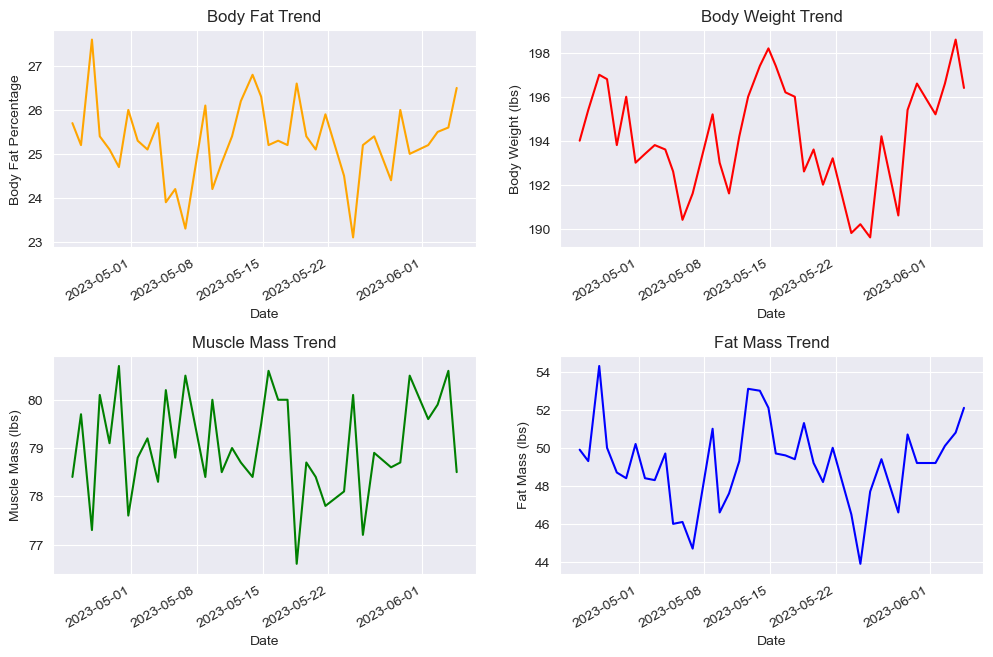

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

new_details.plot(
    ax=axes[0, 0], title="Body Fat Trend", x='date_time' , xlabel="Date",
    y='bodyfat_percentage', ylabel="Body Fat Percentage", legend=False,
    color='orange'
)
new_details.plot(
    ax=axes[0, 1], title="Body Weight Trend", x='date_time', xlabel="Date",
    y='body_weight', ylabel="Body Weight (lbs)", legend=False, color='red'
)
new_details.plot(
    ax=axes[1, 0], title="Muscle Mass Trend", x='date_time', xlabel="Date",
    y='muscle_mass', ylabel="Muscle Mass (lbs)", legend=False, color='green'
)
new_details.plot(
    ax=axes[1, 1], title="Fat Mass Trend", x='date_time', xlabel="Date",
    y='fat_mass', ylabel="Fat Mass (lbs)", legend=False, color='blue'
)


### Box plots to get a feel for the distribution and outliers.

<Axes: xlabel='fat_mass'>

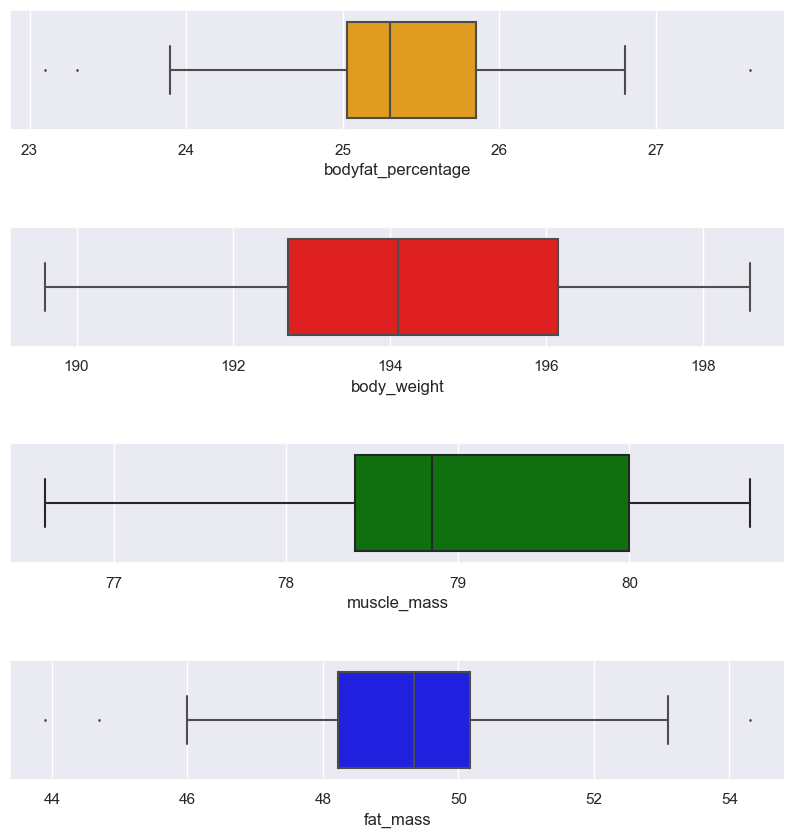

In [94]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10,10))
plt.subplots_adjust(wspace=0.1, hspace=0.8)
sns.boxplot(data=None, x=new_details['bodyfat_percentage'], fliersize=1, ax=axes[0], color='orange')
sns.boxplot(data=None, x=new_details['body_weight'], fliersize=1, ax=axes[1], color='red')
sns.boxplot(data=None, x=new_details['muscle_mass'], fliersize=1, ax=axes[2], color='green')
sns.boxplot(data=None, x=new_details['fat_mass'], fliersize=1, ax=axes[3], color='blue')

### Histogram to determine which weight occurs most frequently.

Text(0.5, 1.0, 'Body Weight Histogram')

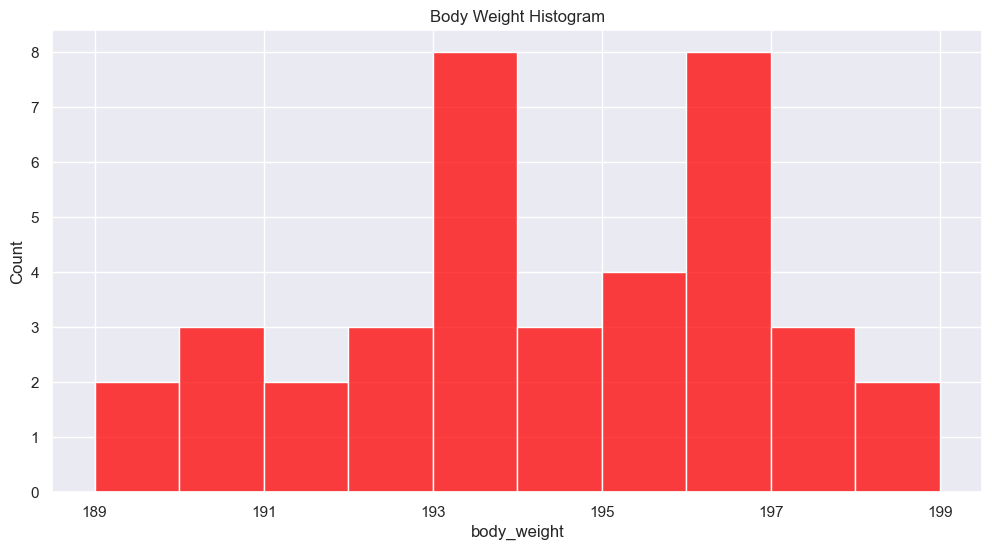

In [95]:
plt.figure(figsize=(12,6))
ax = sns.histplot(new_details['body_weight'], bins=range(189,200,1), color='red')
ax.set_xticks(range(189,200,2))
ax.set_xticklabels(range(189,200,2))
plt.title('Body Weight Histogram')

<h2> LOG: </h2>
<ul>
  <li> 2023-05-15: Wine removed from the diet will determine effectiveness 14 days from the log date.
  <br> - NO EFFECTIVE CHANGE IN BODYFAT %</li>
  <br>
  <li> 2023-05-29: Reduce the range of the calorie cycle to determine effectiveness 30 days from the log date. </li>
</ul>
